## Mathmatical Explanation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

### Simple (univariate) linear regression
the regression model as follows $y_i = \hat{y}(x_i)+u_i$
The goal of supervised learning is to learn a *hypothesis function $\mathbf{\hat{y}}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ \hat{y}_\beta(x_{i}) = \beta_0 + \beta_1x_i }$$
$$ u_i = y_i - \hat{y}$$

$\mathbf{\beta_0,\beta_1}$ are parameter of hypothesis.

$u_i$ is called the residual error between the predicted and actual value.
### Multiple Linear regression
For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{\hat{y}_\beta(x_{i}) = \beta_0 + \beta_1x_{i1} + \beta_2 x_{i2} + ..... \beta_j x_{ij} ...... \beta_n  x_{mn} }$$
$\mathbf{\beta_0,\beta_1,....\beta_j....\beta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.

### Model Hypothesis

* the error average is null $E(u) = 0$ 
* Auto-Correlation Absence $cov(u_t, u_{t^{'}}$)
* Homosedascite $var(u_t) = \sigma^{2}$
* Normal Distribution by applying central limit theorem, $ u_t \sim \mathcal{N}(0,\,\sigma^{2})$


### Simple Linear Regression Estimator 

* $b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
* $b_0 = \bar{y} - b_1\bar{x}$

### Multiple Linear Regression Estimator

* $\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

#### Etimator Properties

* the estimator is Best Linear Unbiased Estimators (BLUE)

### Empric Model Validation

To evaluate a linear regression model, several metrics are commonly used, including Residual Sum of Squares (RSS), Total Sum of Squares (TSS), Explained Sum of Squares (ESS), and the Coefficient of Determination ($R^2$). Here are the formulas for each of these metrics:

1. Residual Sum of Squares (RSS):
   $$\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
   where $n$ is the number of observations, $y_i$ is the observed value, and $\hat{y}_i$ is the predicted value.

2. Total Sum of Squares (TSS):
   $$\text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
   where $\bar{y}$ is the mean of the observed values.

3. Explained Sum of Squares (ESS):
   $$\text{ESS} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$
   where $\hat{y}_i$ is the predicted value.

4. Coefficient of Determination ($R^2$):
   $$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$$
   Alternatively, $R^2$ can be calculated as the ratio of ESS to TSS:
   $$R^2 = \frac{\text{ESS}}{\text{TSS}}$$

Here's a breakdown of what each metric represents:

- RSS (Residual Sum of Squares): Measures the sum of squared differences between the observed and predicted values. It represents the unexplained variation in the dependent variable.

- TSS (Total Sum of Squares): Measures the total variance in the dependent variable. It represents the sum of squared differences between each observed value and the mean of the observed values.

- ESS (Explained Sum of Squares): Measures the sum of squared differences between the predicted values and the mean of the observed values. It represents the explained variation in the dependent variable.

- $ R^2 $ (Coefficient of Determination): Represents the proportion of the total variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

In general, a higher $ R^2 $ indicates a better fit of the model to the data, while lower RSS and higher ESS contribute to a better model performance.


### Statistical Model Validation

* T-Test for Individual Coefficients: $t = \frac{b_i}{\text{SE}(b_i)}$
* F-Test for Overall Model Significance: $F = \frac{\frac{\text{ESS}}{p}}{\frac{\text{RSS}}{n - p - 1}}$

# Multiple Linear Regression Example

## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing 

In [4]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [5]:
# OneHot Encoding:
data = pd.get_dummies(data, columns=['region'], prefix='region')
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [6]:
data['region_northeast'] = data['region_northeast'].astype(int)
data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [18]:
corr = data.corr()['age']
data.corr()['age']

age                 1.000000
sex                -0.020856
bmi                 0.109272
children            0.042469
smoker             -0.025019
charges             0.299008
region_northeast    0.002475
region_northwest   -0.000407
region_southeast   -0.011642
region_southwest    0.010016
Name: age, dtype: float64

In [14]:
# Preparing test & training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('charges', axis=1),
    data['charges'], 
    test_size = 0.2, 
    random_state = 0)

In [27]:
# Training the Model
# from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
# R-squared value for the test set
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.7999876970680435


In [22]:
new_data = data.mul(corr)
new_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,-0.000000,3.048685,0.000000,-0.025019,5048.730620,0.0,-0.000000,-0.000000,0.010016
1,18.0,-0.020856,3.690111,0.042469,-0.000000,515.954276,0.0,-0.000000,-0.011642,0.000000
2,28.0,-0.020856,3.605972,0.127407,-0.000000,1330.425594,0.0,-0.000000,-0.011642,0.000000
3,33.0,-0.020856,2.481018,0.000000,-0.000000,6573.536838,0.0,-0.000407,-0.000000,0.000000
4,32.0,-0.020856,3.155772,0.000000,-0.000000,1156.221387,0.0,-0.000407,-0.000000,0.000000


In [23]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    new_data.drop('charges', axis=1),
    new_data['charges'], 
    test_size = 0.2, 
    random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train_new, y_train_new)

LinearRegression()

In [25]:
# R-squared value for the test set
accuracy = regressor.score(X_test_new, y_test_new)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.7999876970680434


## Comparaison between empiric and testing validation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_train_pred = regressor.predict(X_train)

# Predict on the test set
y_test_pred = regressor.predict(X_test)

# Calculate R-squared
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("R-squared (Test):", r_squared_test)
print("R-squared (Train):", r_squared_train)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

R-squared (Test): 0.7999876970680435
R-squared (Train): 0.7370262574551634
Mean Squared Error (Train): 37701533.128629126
Mean Squared Error (Test): 31827950.229523823


# Multi Layered Perceptron

In [29]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [30]:
# Standardize the data (normalize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Output layer with one unit for regression
])

In [32]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test), verbose=2)

Epoch 1/10
34/34 - 1s - loss: 297579040.0000 - accuracy: 0.0000e+00 - val_loss: 319181856.0000 - val_accuracy: 0.0000e+00 - 1s/epoch - 38ms/step
Epoch 2/10
34/34 - 0s - loss: 294342272.0000 - accuracy: 0.0000e+00 - val_loss: 315343584.0000 - val_accuracy: 0.0000e+00 - 130ms/epoch - 4ms/step
Epoch 3/10
34/34 - 0s - loss: 290678272.0000 - accuracy: 0.0000e+00 - val_loss: 311049056.0000 - val_accuracy: 0.0000e+00 - 133ms/epoch - 4ms/step
Epoch 4/10
34/34 - 0s - loss: 286544640.0000 - accuracy: 0.0000e+00 - val_loss: 306256704.0000 - val_accuracy: 0.0000e+00 - 134ms/epoch - 4ms/step
Epoch 5/10
34/34 - 0s - loss: 281815328.0000 - accuracy: 0.0000e+00 - val_loss: 300759680.0000 - val_accuracy: 0.0000e+00 - 138ms/epoch - 4ms/step
Epoch 6/10
34/34 - 0s - loss: 276471328.0000 - accuracy: 0.0000e+00 - val_loss: 294572416.0000 - val_accuracy: 0.0000e+00 - 139ms/epoch - 4ms/step
Epoch 7/10
34/34 - 0s - loss: 270536064.0000 - accuracy: 0.0000e+00 - val_loss: 287597632.0000 - val_accuracy: 0.0000e+0

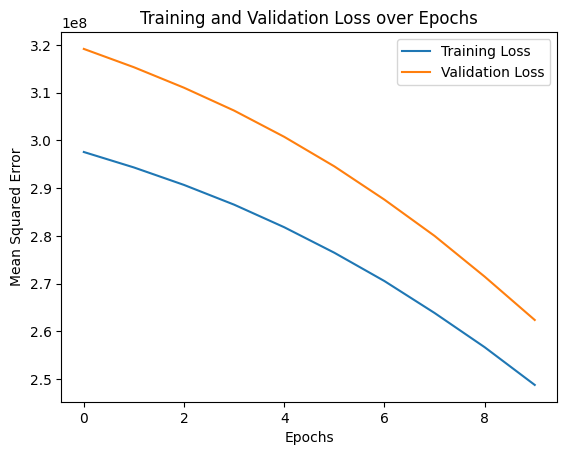

In [33]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [34]:
# Print the learned parameters
weights, biases = model.layers[0].get_weights()
print('Final Weights:', weights)
print('Final Biases:', biases)

Final Weights: [[ 0.23292466  0.6813042   1.1361253   0.27294156  0.5224646   1.0157824
   0.5411704   0.310908    0.76025236  1.0479362   0.6403055   0.29595983
   0.9722665   0.59364986  0.96413094  0.7737076   0.71395046  0.30986124
   0.47467604  1.005684    1.0592523   0.82195437 -0.28377536  0.697506
   1.0848246   1.0251902   0.8383962   0.7160357   0.513368    0.09846649
   1.0613108   1.0417403   0.3943147   0.9290234   1.0257299   0.20147337
   0.9032959   0.16612412  0.69064236  0.8961394   0.7298335   0.67028075
   0.71013665  0.7159264   0.23894185  1.0385413   0.5220768   0.820679
   0.22687893 -0.01139102  0.43814835  0.40866157  0.923206    0.00808785
   0.1332747   0.9273897   0.47847524  0.40566918  0.68102926  0.8283245
   1.0747381   0.9361508   0.9215214   0.8141315 ]
 [ 0.89958394  0.60512745 -0.35120136 -0.15162742  0.12004784 -0.03251512
   0.00864994 -0.07659609  1.0031958   0.89384997  0.70727164  0.00498339
  -0.22883299  0.13329463 -0.709352    0.6466389   1

In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

# References

- Josh Starmer Smith. [StatQuest with Josh Starmer Smith]. (2017, July 24). Linear Regression, Clearly Explained!!!
 [Video file]. Retrieved from https://www.youtube.com/watch?v=nk2CQITm_eo

